In [1]:
import numpy as np
import fuller
import scipy.io as sio
from mpes import fprocessing as fp, analysis as aly
import matplotlib.pyplot as plt

In [2]:
from imp import reload
reload(aly)

<module 'mpes.analysis' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\mpes\\analysis.py'>

In [3]:
bm = fp.readBinnedhdf5('..\data\WSe2_256x256x1024_fullrange_rotsym.h5')

In [4]:
bm['V'].shape

(256, 256, 1024)

In [5]:
emax, emin = -bm['E'][::-1][0], -bm['E'][::-1][499]
emax, emin

(0.0, -8.780059)

In [13]:
mc = aly.MomentumCorrector(bm['V'])

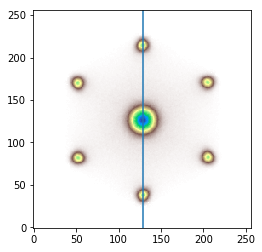

In [14]:
mc.selectSlice2D(slice(30, 38), axis=2)
mc.view(mci.slice)
plt.axvline(x=129)

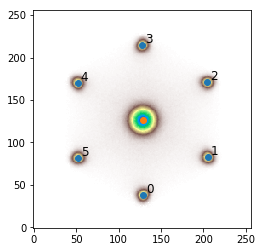

In [15]:
mc.featureExtract(mc.slice, method='daofind', sigma=4, fwhm=7, sigma_radius=2)
mc.view(mc.slice, annotated=True, points=mc.features)

In [16]:
G = mc.pcent
K = mc.pouter_ord[0,:]
M = mc.pouter_ord[:2,:].mean(axis=0)

In [17]:
rpts = np.asarray([G[0], M[0], K[0], G[0]])
cpts = np.asarray([G[1], M[1], K[1], G[1]])
rr, cc, ids = aly.points2path(rpts, cpts, npoints=[40, 32, 50])

In [18]:
paths = np.concatenate((rr, cc, np.ones((120, 1))), axis=1)
bc = aly.bandpath_map(bm['V'][:,:,:500], pathr=rr, pathc=cc, eaxis=2)

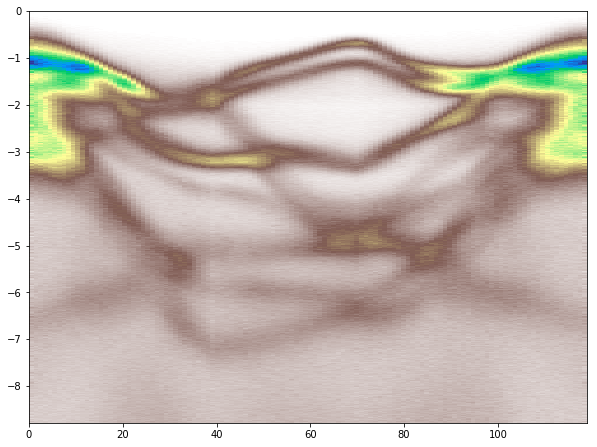

In [20]:
plt.figure(figsize=(10,8))
plt.imshow(bc, cmap='terrain_r', aspect=10, extent=[0, 119, emin, emax])

In [21]:
from skimage.exposure import equalize_adapthist

In [27]:
bceq = equalize_adapthist(bc/100, kernel_size=(20, 12), clip_limit=0.015)

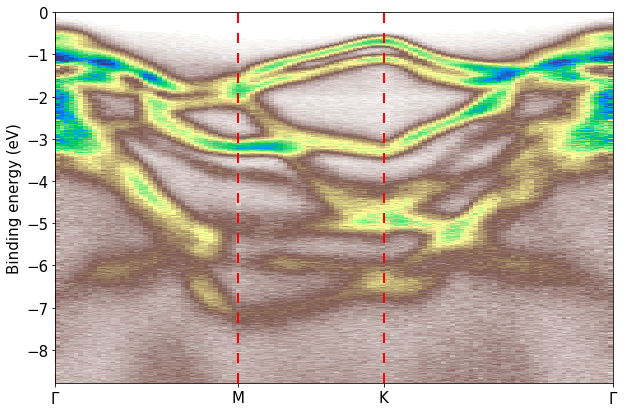

In [28]:
f, ax = plt.subplots(figsize=(10,8))
plt.imshow(bceq, cmap='terrain_r', aspect=9, extent=[0, 119, emin, emax])
for j in range(len(ids)):
    plt.axvline(ids[j], ls='--', dashes=(5, 5), color='r', lw=2)
# plt.xticks([])
plt.tick_params(labelsize=15)
plt.xlim([ids[0], ids[-1]-1])
plt.ylabel('Binding energy (eV)', fontsize=15)
ax.set_xticks([  0,  39,  70, 119])
ax.set_xticklabels(['$\Gamma$', 'M', 'K', '$\Gamma$']);
# plt.savefig('WSe2_Comparison_ExperimentSym_TheoryLDA_Ramp.pdf', bbox_inches='tight', dpi=300)

In [139]:
dicta = [['data', {'cut':bc, 'cut_clahe':bceq}]]
fuller.utils.saveHDF(*dicta, save_addr=r'.\WSe2_BZSymLineCut.h5')